# Serial 1D Multi-grid solution

In [200]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # avoid dnn issue


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import time 

# Parameters to be defined for different grid size and conductivity
dt = 10      # Time step (s)
dx = 1       # Grid size in x      
Dx = 0.1   # Conductivity in x    
# Parameters for the computational domain
alpha = 1    # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128     # Grid point in x
ub = 1       # Velocity (1m/s)

# the weights matrix
w1 = np.zeros([1,2,1])
w2 = np.zeros([1,3,1])
w1[0,:,0] = 0.5
w2[0][0][0] = - ub*dt/(dx) - Dx*dt/dx**2
w2[0][1][0] = 1 + 2*Dx*dt/dx**2 + ub*dt/(dx)
w2[0][2][0] =  - Dx*dt/dx**2

kernel_initializer_1 = tf.keras.initializers.constant(w1)
kernel_initializer_2 = tf.keras.initializers.constant(w2)
bias_initializer = tf.keras.initializers.constant(np.zeros((1,)) )

CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer)
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.UpSampling1D(size=(2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

# you might need incorporate with SFC code here
T = np.zeros([nx])
for i in range(40):
    T[i+43] = 1 
    
input_shape = (1,nx,1)
values = tf.zeros(input_shape)
values = tf.Variable(values)[0,:,0].assign(tf.Variable(values)[0,:,0]+tf.convert_to_tensor(T.astype('float32')))

init_values = values

init_residual = None

start = time.time()
b = values           # only for one time step
multi_itr = 1000     # multigrid iteration
j_itr = 1            # jacobi iteration 
for multi_grid in range(multi_itr):    
    w_2 = np.zeros([1,2,1])
# --------- Calculate Residual based on initial guess --------  
    r = CNN3D_A_128(values) - b
    init_residual = CNN3D_A_128(values)
# ------------------------------------------------------------  

# --------- Interpolate Residual from finer to coaser mesh --------  
    r_64 = CNN3D_res_128(r) 
    r_32 = CNN3D_res_64(r_64) 
    r_16 = CNN3D_res_32(r_32) 
    r_8 = CNN3D_res_16(r_16) 
    r_4 = CNN3D_res_8(r_8) 
    r_2 = CNN3D_res_4(r_4) 
    # r1 = CNN3D_res_2(r_2)    
# -----------------------------------------------------------------      

# --------- Interpolate Residual from coaser to finer mesh --------  
    # for Jacobi in range(j_itr):
    #     w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    # w = w - CNN3D_A_1(w)/w2[0][1][0] + r1/w2[0][1][0]
    # w_2 = CNN3D_prol_1(w)       

    for Jacobi in range(j_itr):
        w_2 = w_2 - CNN3D_A_2(w_2)/w2[0][1][0] + r_2/w2[0][1][0]
        # print("w_2 JACOBI: ",w_2)
    w_4 = CNN3D_prol_2(w_2) 
    for Jacobi in range(j_itr):
        # print("w_4 CNN: ",CNN3D_A_4(w_4))
        w_4 = w_4 - CNN3D_A_4(w_4)/w2[0][1][0] + r_4/w2[0][1][0]
        # print("w_4 JACOBI: ",w_4)
    w_8 = CNN3D_prol_4(w_4) 
    for Jacobi in range(j_itr):
        # print("w_8 CNN: ",CNN3D_A_8(w_8))
        w_8 = w_8 - CNN3D_A_8(w_8)/w2[0][1][0] + r_8/w2[0][1][0]
        # print("w_8 JACOBI: ",w_8)
    w_16 = CNN3D_prol_8(w_8) 
    for Jacobi in range(j_itr):
        w_16 = w_16 - CNN3D_A_16(w_16)/w2[0][1][0] + r_16/w2[0][1][0]
    w_32 = CNN3D_prol_16(w_16) 
    for Jacobi in range(j_itr):
        w_32 = w_32 - CNN3D_A_32(w_32)/w2[0][1][0] + r_32/w2[0][1][0]
    w_64 = CNN3D_prol_32(w_32)
    for Jacobi in range(j_itr):
        w_64 = w_64 - CNN3D_A_64(w_64)/w2[0][1][0] + r_64/w2[0][1][0]
    w_128 = CNN3D_prol_64(w_64)
    w_128 = w_128 - CNN3D_A_128(w_128)/w2[0][1][0] + r/w2[0][1][0]
# ----------------------------------------------------------------- 

# --------- Correct initial guess --------  
    values = values - w_128 
    values = values - CNN3D_A_128(values)/w2[0][1][0] + b/w2[0][1][0]
# ----------------------------------------  
end = time.time()
print('Computational time(s):',(end-start))
print('Multigrid iterations:', multi_itr)
print('Jacobi iterations:', j_itr)

Computational time(s): 8.84988784790039
Multigrid iterations: 1000
Jacobi iterations: 1


### Steady state results

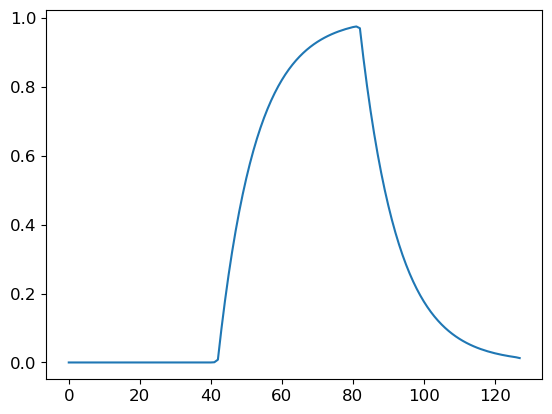

In [201]:
plt.plot(values[0,:,0])

# Pre-installation

In [202]:
## Install the required dependencies
import numpy as np
import matplotlib.pyplot as plt

# MPI subroutines

use halo_exchange_upgrade here.

# Parallel 1D

In [203]:
%%writefile parallel_multigrid_1D.py
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
from time import perf_counter

# import halo_exchanged
from halo_exchange_upgraded import HaloExchange
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # avoid dnn issue

# Parameters to be defined for different grid size and conductivity
dt = 10      # Time step (s)
dx = 1       # Grid size in x      
Dx = 0.1   # Conductivity in x    
# Parameters for the computational domain
alpha = 1    # relaxation coefficient for Jacobi iteration (from 0 to 1)
nx = 128     # Grid point in x
ub = 1       # Velocity (1m/s)

# the weights matrix
w1 = np.zeros([1,2,1])
w2 = np.zeros([1,3,1])
w1[0,:,0] = 0.5
w2[0][0][0] = - ub*dt/(dx) - Dx*dt/dx**2
w2[0][1][0] = 1 + 2*Dx*dt/dx**2 + ub*dt/(dx)
w2[0][2][0] =  - Dx*dt/dx**2

kernel_initializer_1 = tf.keras.initializers.constant(w1)
kernel_initializer_2 = tf.keras.initializers.constant(w2)
bias_initializer = tf.keras.initializers.constant(np.zeros((1,)))

CNN3D_A_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer)
])

CNN3D_A_66 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(66, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_34 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(34, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_18 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(18, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_10 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(10, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_6 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(6, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='VALID',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

CNN3D_A_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=3, strides=1, padding='SAME',         # A matrix
                                kernel_initializer=kernel_initializer_2,
                                bias_initializer=bias_initializer),
])

# restrictions

CNN3D_res_128 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(nx, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),   
])    
CNN3D_res_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),  
])
CNN3D_res_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer), 
])
CNN3D_res_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])
CNN3D_res_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.Conv1D(1, kernel_size=2, strides=2, padding='VALID',  # restriction
                                kernel_initializer=kernel_initializer_1,
                                bias_initializer=bias_initializer),
])

# prolongation
CNN3D_prol_1 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(1, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_2 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(2, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_4 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(4, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

CNN3D_prol_8 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(8, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_16 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(16, 1)),
         tf.keras.layers.UpSampling1D(size=(2)), 
])

CNN3D_prol_32 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(32, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),   
])

CNN3D_prol_64 = keras.models.Sequential([
         keras.layers.InputLayer(input_shape=(64, 1)),
         tf.keras.layers.UpSampling1D(size=(2)),
])

# you might need incorporate with SFC code here
T = np.zeros([nx])
for i in range(40):
    T[i+43] = 1 

he = HaloExchange(structured=True,tensor_used=True,double_precision=True,corner_exchanged=False)
sub_nx, current_domain = he.initialization(T,is_periodic=False,is_reordered=False)
sub_x = sub_nx + 2
rank = he.rank

# need 1 update before the multigrid
current_domain = he.structured_halo_update_1D(current_domain)
current_domain = current_domain.numpy().reshape(sub_x,)

# convert current domain to tensor
input_shape = (1,sub_x,1)
values = tf.zeros(input_shape) # (1,66,1)
values = tf.Variable(values)[0,:,0].assign(tf.Variable(values)[0,:,0]+tf.convert_to_tensor(current_domain.astype('float32')))

start = perf_counter()
b = tf.reshape(values[0,1:-1,0],(1,sub_nx,1))           # only for one time step
# b = values         # only for one time step
multi_itr = 1000      # multigrid iteration
j_itr = 1          # jacobi iteration 

for multi_grid in range(multi_itr):    
    w = np.zeros([1,1,1]) # from 1 -> 64
# --------- Calculate Residual based on initial guess --------  
    # r = CNN3D_A_128(values) - b 
    r = CNN3D_A_66(values) - b
# ------------------------------------------------------------  

# --------- Interpolate Residual from finer to coaser mesh --------  
    r_32 = CNN3D_res_64(r)
    r_16 = CNN3D_res_32(r_32)
    r_8 = CNN3D_res_16(r_16) 
    r_4 = CNN3D_res_8(r_8) 
    r_2 = CNN3D_res_4(r_4) 
    r_1 = CNN3D_res_2(r_2)    
    
# -----------------------------------------------------------------      

# --------- Interpolate Residual from coaser to finer mesh --------  
    for Jacobi in range(j_itr):
        w = w - CNN3D_A_1(w)/w2[0][1][0] + r_1/w2[0][1][0]
    w = w - CNN3D_A_1(w)/w2[0][1][0] + r_1/w2[0][1][0]
    
    # print('RESIDUAL 1 SHAPE: ', w.shape)

    w_2 = CNN3D_prol_1(w)
    w_t1 = he.padding_block_halo_1D(w_2,1)
    w_t1 = he.structured_halo_update_1D(w_t1)     
    for Jacobi in range(j_itr):
        temp = CNN3D_A_4(w_t1)
        w_2 = w_2 - temp/w2[0][1][0] + r_2/w2[0][1][0]
        
    # print('RESIDUAL 2 SHAPE: ', w_2.shape)

    w_4 = CNN3D_prol_2(w_2)
    w_t2 = he.padding_block_halo_1D(w_4,1)
    w_t2 = he.structured_halo_update_1D(w_t2)   
    for Jacobi in range(j_itr):
        temp = CNN3D_A_6(w_t2)
        w_4 = w_4 - temp/w2[0][1][0] + r_4/w2[0][1][0]
        
    # print('RESIDUAL 4 SHAPE: ', w_4.shape)

    w_8 = CNN3D_prol_4(w_4)
    w_t3 = he.padding_block_halo_1D(w_8,1)
    w_t3 = he.structured_halo_update_1D(w_t3)    
    for Jacobi in range(j_itr):
        temp = CNN3D_A_10(w_t3)
        w_8 = w_8 - temp/w2[0][1][0] + r_8/w2[0][1][0]
        
    # print('RESIDUAL 8 SHAPE: ', w_8.shape)

    w_16 = CNN3D_prol_8(w_8)
    w_t4 = he.padding_block_halo_1D(w_16,1)
    w_t4 = he.structured_halo_update_1D(w_t4)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_18(w_t4)
        w_16 = w_16 - temp/w2[0][1][0] + r_16/w2[0][1][0]
        
    # print('RESIDUAL 16 SHAPE: ', w_16.shape)
    
    w_32 = CNN3D_prol_16(w_16)
    w_t5 = he.padding_block_halo_1D(w_32,1)
    w_t5 = he.structured_halo_update_1D(w_t5)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_34(w_t5)
        w_32 = w_32 - temp/w2[0][1][0] + r_32/w2[0][1][0]

    # print('RESIDUAL 32 SHAPE: ', w_32.shape)

    w_64 = CNN3D_prol_32(w_32)
    w_t6 = he.padding_block_halo_1D(w_64,1)
    w_t6 = he.structured_halo_update_1D(w_t6)  
    for Jacobi in range(j_itr):
        temp = CNN3D_A_66(w_t6)
        w_64 = w_64 - temp/w2[0][1][0] + r/w2[0][1][0]
        
    # print('RESIDUAL 64 SHAPE: ', w_64.shape)

    #w_128 = CNN3D_prol_64(w_64)
    #w_128 = w_128 - CNN3D_A_128(w_128)/w2[0][1][0] + r/w2[0][1][0]
# ----------------------------------------------------------------- 

# --------- Correct initial guess --------  
    #values = values - w_128 
    #values = values - CNN3D_A_128(values)/w2[0][1][0] + b/w2[0][1][0]

    w_64 = he.padding_block_halo_1D(w_64,1)
    w_64 = he.structured_halo_update_1D(w_64)
    
    values = values - w_64
    tempVal = tf.reshape(values[0,1:-1,0],(1,64,1))
    tempVal = tempVal - CNN3D_A_66(values)/w2[0][1][0] + b/w2[0][1][0]
    values = he.padding_block_halo_1D(tempVal,1)
    values = he.structured_halo_update_1D(values)
    
# ----------------------------------------  
end = perf_counter()
print('Computational time(s):',(end-start))
print('Multigrid iterations:', multi_itr)
print('Jacobi iterations:', j_itr)

np.save("parallel_out/parallel_res_{}".format(rank),values[0,1:-1,0])
np.save("parallel_residuals/w_{}".format(rank),w)
np.save("parallel_residuals/w2_{}".format(rank),w_2)
np.save("parallel_residuals/w4_{}".format(rank),w_4)
np.save("parallel_residuals/w8_{}".format(rank),w_8)
np.save("parallel_residuals/w16_{}".format(rank),w_16)
np.save("parallel_residuals/w32_{}".format(rank),w_32)
np.save("parallel_residuals/w64_{}".format(rank),w_64)

Overwriting parallel_multigrid_1D.py


In [204]:
! mkdir parallel_residuals
! mpiexec -n 2 python parallel_multigrid_1D.py

mkdir: parallel_residuals: File exists
Computational time(s): 9.45307012507692
Multigrid iterations: 1000
Jacobi iterations: 1
Computational time(s): 9.453071541851386
Multigrid iterations: 1000
Jacobi iterations: 1


# Result analysis

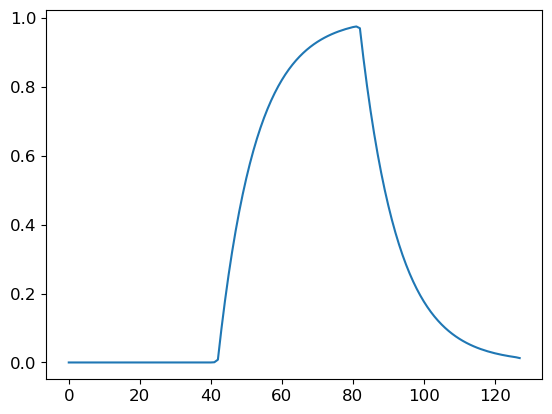

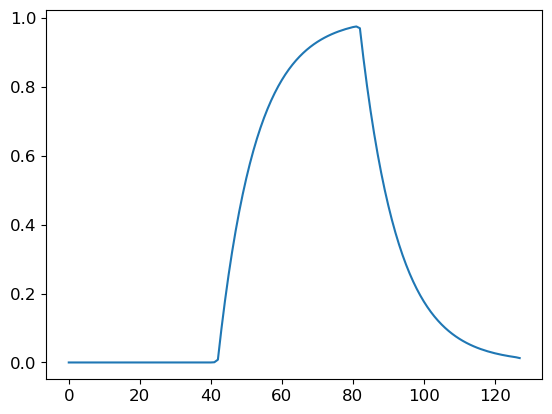

(128,)
(128,)
ABE: 0.0
AVG ABE: 0.0
AVG NORM ABE:  0.0


In [205]:
import numpy.linalg as LA

# plot the serial result
plt.plot(values[0,:, 0])
plt.show()

# plot the parallel result
res_1 = np.load('parallel_out/parallel_res_0.npy')
res_2 = np.load('parallel_out/parallel_res_1.npy')

parallel_solution = np.concatenate([res_1,res_2],axis=0)
plt.plot(parallel_solution)
plt.show()

# result analysis
print(values[0,:,0].shape)
print(parallel_solution.shape)
print("ABE:",np.sum(np.abs((values[0,:,0])) - np.abs(parallel_solution)))
print("AVG ABE:",np.sum(np.abs((values[0,:,0])) - np.abs(parallel_solution))/128)
print("AVG NORM ABE: ",np.abs(LA.norm(values[0,:,0]) - LA.norm(parallel_solution)) / 128)

# The accuracy error on the first multi-grid iteration is 0.0 and increase bit by bit in the following iterations

## residual on 2

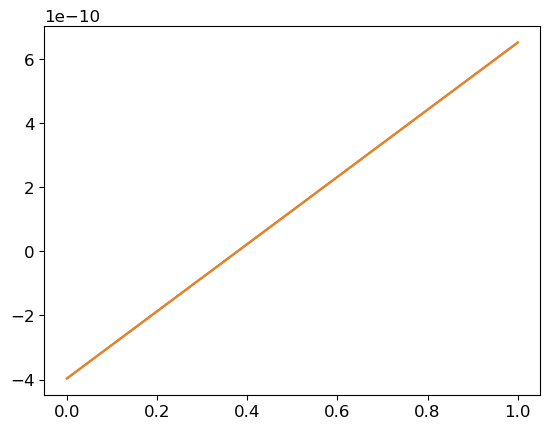

(2,)
(2,)
0.0
0.0


In [206]:
pw_1 = np.load('parallel_residuals/w_0.npy')[0,:,0]
pw_2 = np.load('parallel_residuals/w_1.npy')[0,:,0]

parallel_w = np.concatenate([pw_1,pw_2],axis=0)
plt.plot(w_2[0,:,0])
plt.plot(parallel_w)
plt.show()
print(w_2[0,:,0].shape)
print(parallel_w.shape)
print(np.sum(np.abs(w_2[0,:,0] - parallel_w)) /2)
print(np.abs(LA.norm(w_2[0,:,0]) - LA.norm(parallel_w)) / 2)
# parallel_w.shape

In [207]:
print(w_2[0,:,0])
print(parallel_w)

tf.Tensor([-3.9675557e-10  6.5259742e-10], shape=(2,), dtype=float32)
[-3.9675557e-10  6.5259742e-10]


## residual on 4

In [208]:
pw2_1 = np.load('parallel_residuals/w2_0.npy')[0,:,0]
pw2_2 = np.load('parallel_residuals/w2_1.npy')[0,:,0]
parallel_w2 = np.concatenate([pw2_1,pw2_2],axis=0)
print(w_4[0,:,0])
print(parallel_w2)

tf.Tensor([-2.6962663e-11 -1.0825846e-09  9.3236685e-10  6.3950928e-10], shape=(4,), dtype=float32)
[-2.6962663e-11 -1.0825846e-09  9.3236685e-10  6.3950928e-10]


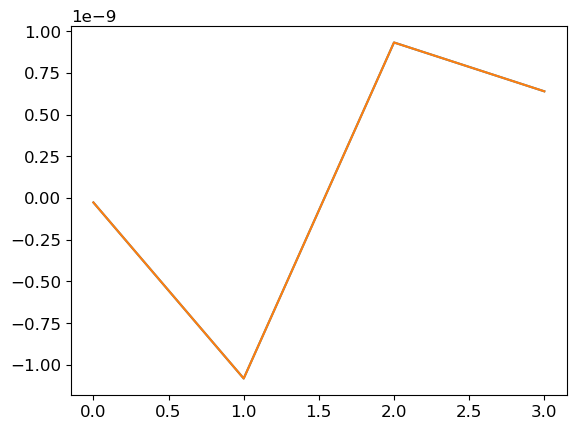

0.0
0.0


In [209]:
plt.plot(w_4[0,:,0])
plt.plot(parallel_w2)
plt.show()
print(np.sum(np.abs(w_4[0,:,0] - parallel_w2)) /4)
print(np.abs(LA.norm(w_4[0,:,0]) - LA.norm(parallel_w2)) / 4)

## residual on 8

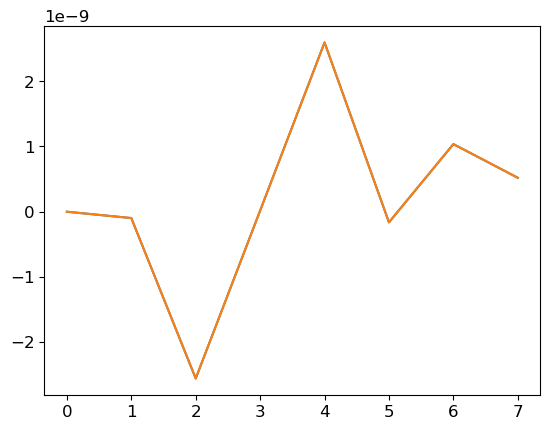

In [210]:
pw4_1 = np.load('parallel_residuals/w4_0.npy')[0,:,0]
pw4_2 = np.load('parallel_residuals/w4_1.npy')[0,:,0]
parallel_w4 = np.concatenate([pw4_1,pw4_2],axis=0)

plt.plot(w_8[0,:,0])
plt.plot(parallel_w4)
plt.show()

In [211]:
print(w_8[0,:,0])
print(parallel_w4)
print(np.sum(np.abs(w_8[0,:,0] - parallel_w4)) /8)
print(np.abs(LA.norm(w_8[0,:,0]) - LA.norm(parallel_w4)) / 8)

tf.Tensor(
[-1.8801065e-12 -9.9170283e-11 -2.5599092e-09  1.5369761e-11
  2.5944169e-09 -1.6484403e-10  1.0351293e-09  5.1873572e-10], shape=(8,), dtype=float32)
[-1.8801065e-12 -9.9170283e-11 -2.5599092e-09  1.5369761e-11
  2.5944169e-09 -1.6484403e-10  1.0351293e-09  5.1873572e-10]
0.0
0.0


## residual on 16

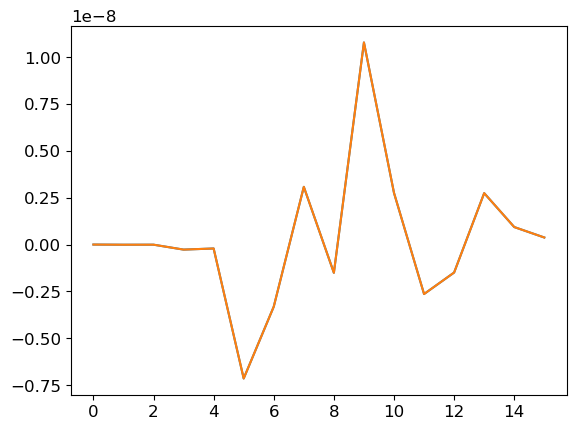

In [212]:
pw8_1 = np.load('parallel_residuals/w8_0.npy')[0,:,0]
pw8_2 = np.load('parallel_residuals/w8_1.npy')[0,:,0]

parallel_w8 = np.concatenate([pw8_1,pw8_2],axis=0)
plt.plot(w_16[0,:,0])
plt.plot(parallel_w8)
plt.show()

In [213]:
print(w_16[0,:,0])
print(parallel_w8)

print(np.sum(np.abs(w_16[0,:,0] - parallel_w8)) /16)
print(np.abs(LA.norm(w_16[0,:,0]) - LA.norm(parallel_w8)) / 16)

tf.Tensor(
[-1.2537268e-13 -8.8507049e-12 -6.7485236e-12 -2.6946020e-10
 -2.0947294e-10 -7.1438881e-09 -3.3111380e-09  3.0781837e-09
 -1.5067892e-09  1.0779419e-08  2.7557174e-09 -2.6389053e-09
 -1.4926620e-09  2.7426064e-09  9.3369146e-10  3.7624504e-10], shape=(16,), dtype=float32)
[-1.2537268e-13 -8.8507049e-12 -6.7485236e-12 -2.6946020e-10
 -2.0947294e-10 -7.1438881e-09 -3.3111380e-09  3.0781837e-09
 -1.5067892e-09  1.0779419e-08  2.7557174e-09 -2.6389053e-09
 -1.4926620e-09  2.7426064e-09  9.3369146e-10  3.7624504e-10]
0.0
0.0


## residual on 32

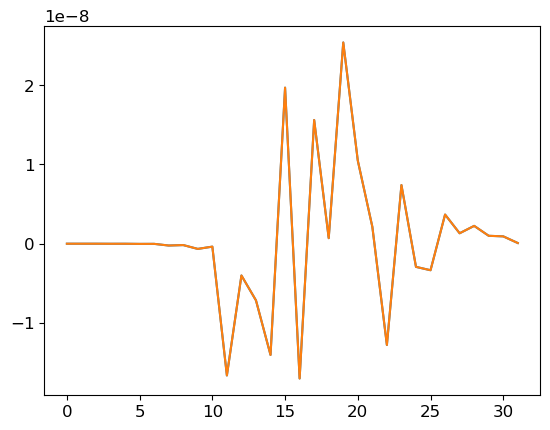

In [214]:
pw16_1 = np.load('parallel_residuals/w16_0.npy')[0,:,0]
pw16_2 = np.load('parallel_residuals/w16_1.npy')[0,:,0]

parallel_w16 = np.concatenate([pw16_1,pw16_2],axis=0)
plt.plot(w_32[0,:,0])
plt.plot(parallel_w16)
plt.show()

In [215]:
# print(w_32[0,:,0])
# print(parallel_w16)
print(np.sum(np.abs(w_32[0,:,0] - parallel_w16)) /32)
print(np.abs(LA.norm(w_32[0,:,0]) - LA.norm(parallel_w16)) / 32)

0.0
0.0


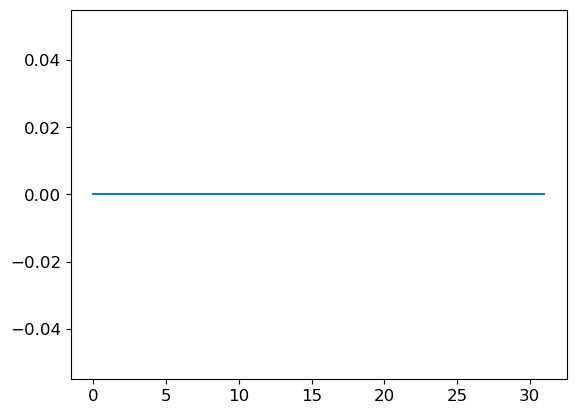

In [216]:
# where are the error located ? 
abe = np.abs(w_32[0,:,0] - parallel_w16)
plt.plot(abe)
plt.show()

## residual on 64

(64,) (64,)


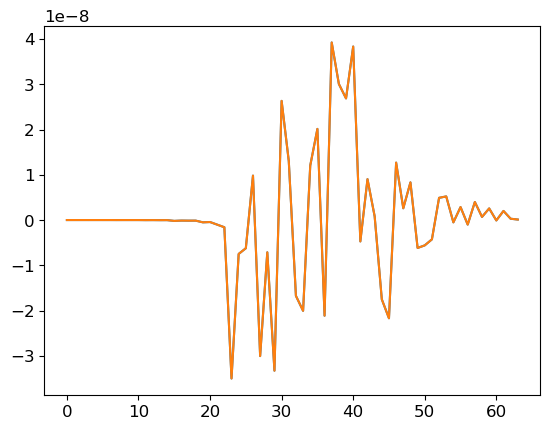

In [217]:
pw32_1 = np.load('parallel_residuals/w32_0.npy')[0,:,0]
pw32_2 = np.load('parallel_residuals/w32_1.npy')[0,:,0]

parallel_w32 = np.concatenate([pw32_1,pw32_2],axis=0)

print(parallel_w32.shape,w_64[0,:,0].shape)

plt.plot(w_64[0,:,0])
plt.plot(parallel_w32)

In [218]:
# print(w_64[0,:,0])
# print(parallel_w32)
print(np.sum(np.abs(w_64[0,:,0] - parallel_w32)) /64)
print(np.abs(LA.norm(w_64[0,:,0]) - LA.norm(parallel_w32)) / 64)

0.0
0.0


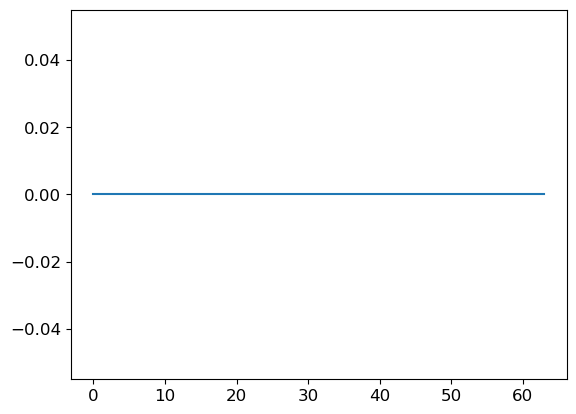

In [219]:
# where are the error located ? 
abe = np.abs(w_64[0,:,0] - parallel_w32)
plt.plot(abe)
plt.show()

## residual on 128

(128,) (128,)


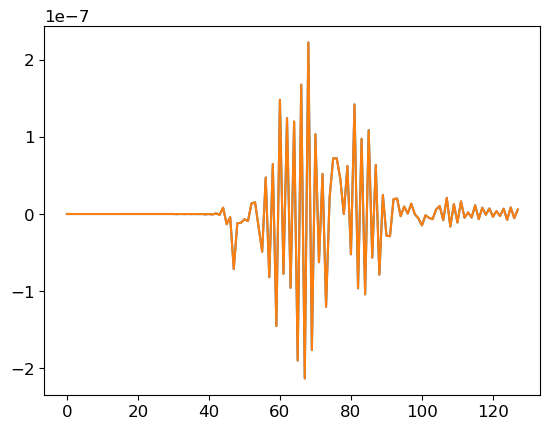

In [220]:
pw64_1 = np.load('parallel_residuals/w64_0.npy')[0,1:-1,0]
pw64_2 = np.load('parallel_residuals/w64_1.npy')[0,1:-1,0]

parallel_w64 = np.concatenate([pw64_1,pw64_2],axis=0)

print(parallel_w64.shape,w_128[0,:,0].shape)

plt.plot(w_128[0,:,0])
plt.plot(parallel_w64)
plt.show()

In [221]:
# print(w_128[0,:,0])
# print(parallel_w64)

print(np.sum(np.abs(w_128[0,:,0] - parallel_w64)) /128)
print(np.abs(LA.norm(w_128[0,:,0]) - LA.norm(parallel_w64)) / 128)

0.0
0.0
